In [334]:
#Reading Data
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
#preprocessing
from sklearn.preprocessing import StandardScaler
#modeling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

#metircs
from sklearn import metrics
from sklearn.metrics import confusion_matrix



# Data cleaning
I am cleaning my data. During the cleaning process i dop nan values.
I also deal with my categorical values by creating dummy variables

In [571]:
airline=pd.read_csv('airline_train.csv')

In [573]:
airline.shape

(103904, 25)

In [486]:
airline=airline.dropna(axis=0)

In [487]:
#Creating Dummies
Gender_dummies=pd.get_dummies(airline['Gender'], drop_first=True)
Customer_dummies=pd.get_dummies(airline['Customer Type'], drop_first=True)
Type_travel_dummies=pd.get_dummies(airline['Type of Travel'], drop_first=True)
Class_dummies=pd.get_dummies(airline['Class'], drop_first=True)
Satisfaction_dummies=pd.get_dummies(airline['satisfaction'], drop_first=True)

In [488]:
#since i have them as Dummies i can drop these features
airline= airline.drop(['Gender','Customer Type','Type of Travel','Class','satisfaction','id'], axis=1)

In [489]:
airline = pd.concat([airline,Gender_dummies,Customer_dummies,Type_travel_dummies,Class_dummies,Satisfaction_dummies], axis=1)

In [490]:
airline=airline.drop(columns=['Unnamed: 0'])

In [491]:
airline.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Male', 'disloyal Customer', 'Personal Travel', 'Eco', 'Eco Plus',
       'satisfied'],
      dtype='object')

In [492]:
X=airline.drop(columns=['satisfied'])
y=airline['satisfied']

# EDA
 During this phase i want to get a better understanding of my data. Some things i did was see how some features related to the satisfaction of the flight

Text(0, 0.5, 'Count')

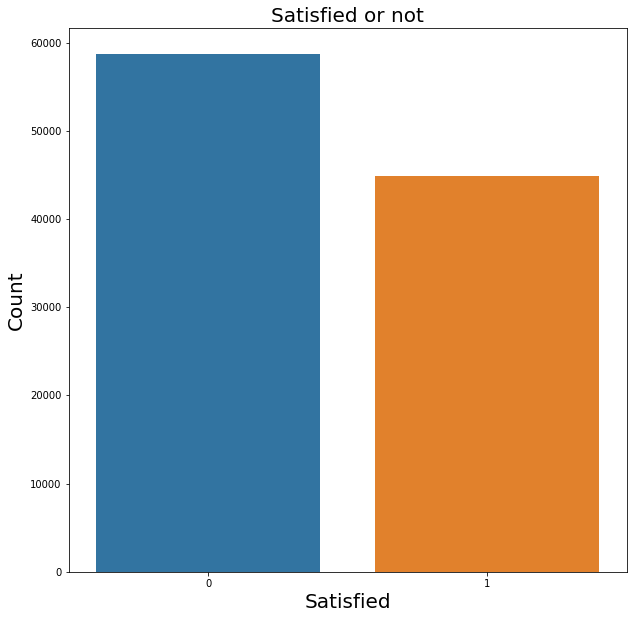

In [382]:
#my target variable is pretty balanced. 
plt.figure(figsize=(10,10))
sns.countplot(x='satisfied',data=airline)
plt.title('Satisfied or not',fontsize=20)
plt.xlabel('Satisfied',fontsize=20)
plt.ylabel('Count',fontsize=20)

In [199]:
satisfied_flights=airline[airline['satisfied'] ==1] 
  

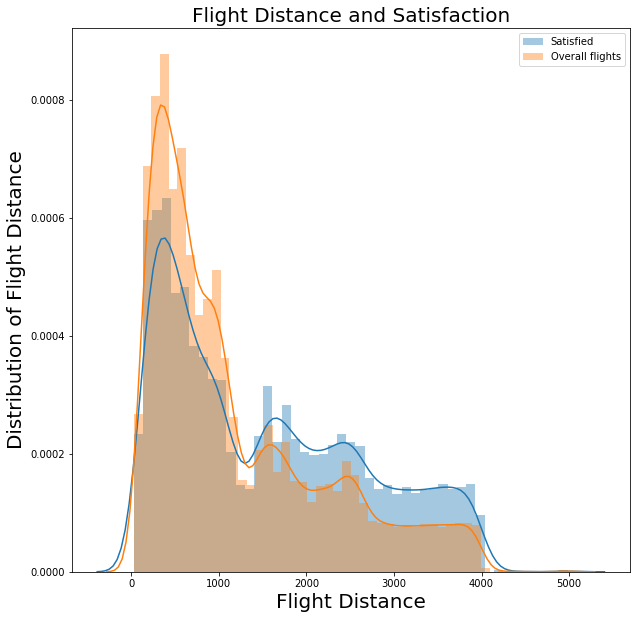

In [387]:
plt.figure(figsize=(10,10))
sns.distplot(satisfied_flights['Flight Distance'],label='Satisfied')
sns.distplot(airline['Flight Distance'],label='Overall flights')
plt.title('Flight Distance and Satisfaction',fontsize=20)
plt.ylabel('Distribution of Flight Distance',fontsize=20)
plt.xlabel('Flight Distance',fontsize=20)


plt.legend()


In [201]:
satisfied_flights

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,0,0,1
7,52,2035,4,3,4,4,5,5,5,5,...,5,4,4,0.0,0,0,0,0,0,1
13,33,946,4,2,4,3,4,4,4,4,...,2,4,0,0.0,1,0,1,1,0,1
16,26,2123,3,3,3,3,4,4,4,4,...,4,4,49,51.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103890,56,550,3,5,5,5,2,5,4,3,...,3,3,0,0.0,0,0,0,0,1,1
103891,54,1991,5,5,5,5,2,5,5,4,...,4,4,35,31.0,1,0,0,0,0,1
103894,26,712,4,4,4,4,5,5,5,5,...,4,5,17,26.0,1,0,0,0,0,1
103897,60,1599,5,5,5,5,5,5,4,4,...,4,4,9,7.0,0,0,0,0,0,1


Text(0.5, 0, 'Age')

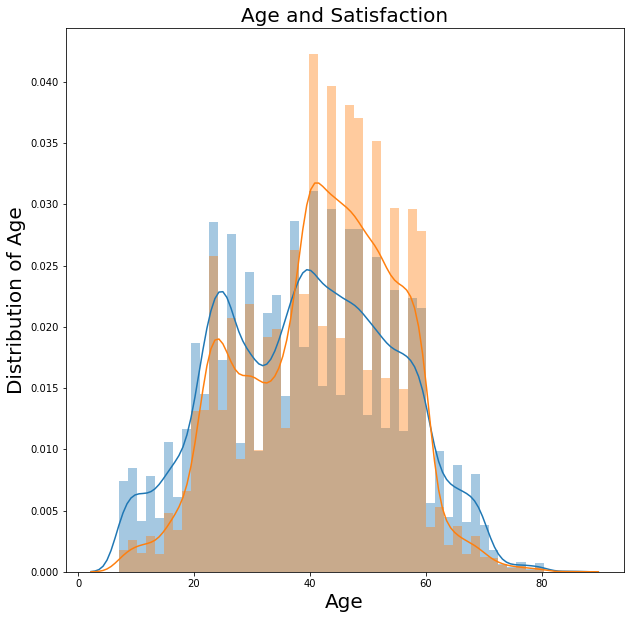

In [390]:
#Average age of the people were waround 35-50
plt.figure(figsize=(10,10))
sns.distplot(airline['Age'],label='Overall')
sns.distplot(satisfied_flights['Age'],label='Satisfied')
plt.title('Age and Satisfaction',fontsize=20)
plt.ylabel('Distribution of Age',fontsize=20)
plt.xlabel('Age',fontsize=20)


# Modeling
I wanted to implement multiple models to help better predict flight satisfaction.
The models i used were Knn, Logestic Regression, and Decision Trees
First i wanted to build a simple vanilla models.

In [203]:
#KNN 

In [344]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [345]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [346]:
Y_pred_classbknn = knn.predict(X_train)

In [347]:
Accuracy_bknn= str(metrics.accuracy_score(y_train, Y_pred_classbknn))
Recall_bknn= str(metrics.recall_score(y_train, Y_pred_classbknn))
Precision_bknn=str(metrics.precision_score(y_train, Y_pred_classbknn))
F1_bknn=str(metrics.f1_score(y_train, Y_pred_classbknn))
Roc_Auc_bknn=str(metrics.roc_auc_score(y_train, Y_pred_classbknn))
scores_bknn=Accuracy_bknn,Recall_bknn,Precision_bknn,F1_bknn,Roc_Auc_bknn

In [348]:
scores_bknn
for score in scores_bknn:
    print (score+':','Acuracy')
    print(scores_bknn[1],':','Recall')
    print(scores_bknn[2],':','Precision_bknn')
    print(scores_bknn[3],':','F1')
    print(scores_bknn[4],':','Roc_Auc')
    break

0.8286455505279035: Acuracy
0.7628163982920771 : Recall
0.8274004116721153 : Precision_bknn
0.7937969187878436 : F1
0.8208027827096624 : Roc_Auc


In [349]:
cmbknn=confusion_matrix(y_train, Y_pred_classbknn)
cmbknn

array([[41340,  5702],
       [ 8499, 27334]])

Text(0.5, 0, 'Predicted label')

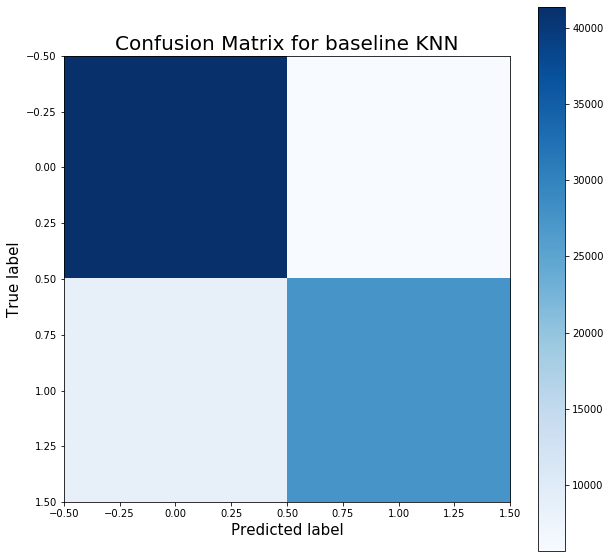

In [350]:
plt.figure(figsize=(10,10))
plt.imshow(cmbknn,  cmap=plt.cm.Blues) 
plt.colorbar()
plt.title('Confusion Matrix for baseline KNN',fontsize=20)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)


In [351]:
#basic Logestic Regression

In [110]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

/Users/sabirrahmanny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
Y_pred_classblr = lr.predict(X_train)

In [114]:
Accuracyblr= str(metrics.accuracy_score(y_train,Y_pred_classblr ))
Recallblr= str(metrics.recall_score(y_train, Y_pred_classblr ))
Precisionblr=str(metrics.precision_score(y_train, Y_pred_classblr ))
F1blr=str(metrics.f1_score(y_train, Y_pred_classblr ))
Roc_Aucblr=str(metrics.roc_auc_score(y_train, Y_pred_classblr ))
scores_blr=Accuracyblr,Recallblr,Precisionblr,F1blr,Roc_Aucblr
scoresblr

('0.8758612368024132',
 '0.8373566265732705',
 '0.8705933555781228',
 '0.8536515974849925',
 '0.8712738661968006')

In [115]:
for score in scores_blr:
    print (score+':','Acuracy')
    print(scores_bknn[1],':','Recall')
    print(scores_bknn[2],':','Precision_bknn')
    print(scores_bknn[3],':','F1')
    print(scores_bknn[4],':','Roc_Auc')
    break

0.8758612368024132: Acuracy
0.7628163982920771 : Recall
0.8274004116721153 : Precision_bknn
0.7937969187878436 : F1
0.8208027827096624 : Roc_Auc


In [119]:
cmblr=confusion_matrix(y_train,Y_pred_classblr  )
cmblr

array([[42582,  4460],
       [ 5828, 30005]])

Text(0.5, 0, 'Predicted label')

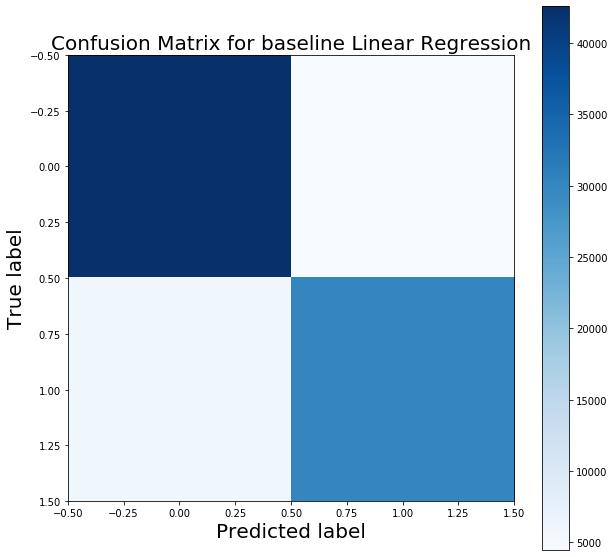

In [126]:
plt.figure(figsize=(10,10))
plt.imshow(cmblr,  cmap=plt.cm.Blues) 
plt.colorbar()
plt.title('Confusion Matrix for baseline Linear Regression',fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)

In [ ]:
# Decision Tree 

In [128]:
dtc = DecisionTreeClassifier()  
dtc.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [130]:
y_pred_classbdtc = dtc.predict(X_train)

In [134]:
Accuracydtc= str(metrics.accuracy_score(y_train,y_pred_classbdtc))
Recalldtc= str(metrics.recall_score(y_train, y_pred_classbdtc))
Precisiondtc=str(metrics.precision_score(y_train,y_pred_classbdtc))
F1dtc=str(metrics.f1_score(y_train,y_pred_classbdtc))
Roc_Aucdtc=str(metrics.roc_auc_score(y_train, y_pred_classbdtc))
scoresdtc=Accuracydtc,Recalldtc,Precisiondtc,F1dtc,Roc_Aucdtc

In [135]:
for score in scoresdtc:
    print (score+':','Acuracy')
    print(scores_bknn[1],':','Recall')
    print(scores_bknn[2],':','Precision_bknn')
    print(scores_bknn[3],':','F1')
    print(scores_bknn[4],':','Roc_Auc')
    break

1.0: Acuracy
0.7628163982920771 : Recall
0.8274004116721153 : Precision_bknn
0.7937969187878436 : F1
0.8208027827096624 : Roc_Auc


In [136]:
cmdt=confusion_matrix(y_train, y_pred)
cmdt

array([[47042,     0],
       [    0, 35833]])

Text(0.5, 0, 'Predicted label')

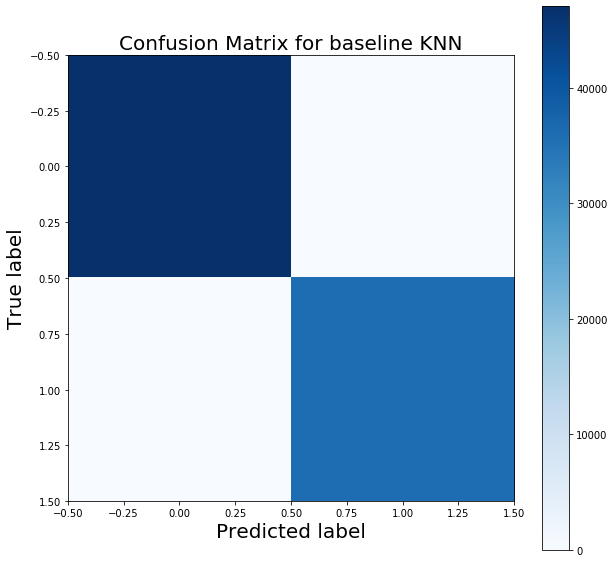

In [140]:
plt.figure(figsize=(10,10))
plt.imshow(cmdt,  cmap=plt.cm.Blues) 
plt.colorbar()
plt.title('Confusion Matrix for baseline KNN',fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)

# building better models
To build better models i am going to use go more indepth with data cleaning. I am going to use Standard scalar to normalize my data. I am also going to remove outliers. Lastly i am going to use multiple ensamble methods to make my models better.

In [482]:
airline.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [493]:
numerical_cols=airline.drop(columns=['Male','disloyal Customer' ,'Personal Travel', 'Eco' ,'Eco Plus' ,'satisfied'])

In [494]:
#checking for multicolinearatiy
numerical_cols.corr()>.75

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Flight Distance,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Inflight wifi service,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Departure/Arrival time convenient,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Ease of Online booking,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Gate location,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Food and drink,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Online boarding,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Seat comfort,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Inflight entertainment,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [495]:
cat_var=airline[['Male','disloyal Customer','Personal Travel','Eco','Eco Plus','satisfied']]

In [496]:
cat_var.corr()>.75

,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
Male,True,False,False,False,False,False
disloyal Customer,False,True,False,False,False,False
Personal Travel,False,False,True,False,False,False
Eco,False,False,False,True,False,False
Eco Plus,False,False,False,False,True,False
satisfied,False,False,False,False,False,True


In [497]:
#Standard Scalar to normalize my dataset
ss = StandardScaler()
column_names = numerical_cols.columns
numerical_cols = pd.DataFrame(ss.fit_transform(numerical_cols))
numerical_cols.columns = column_names

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text xticklabel objects>)

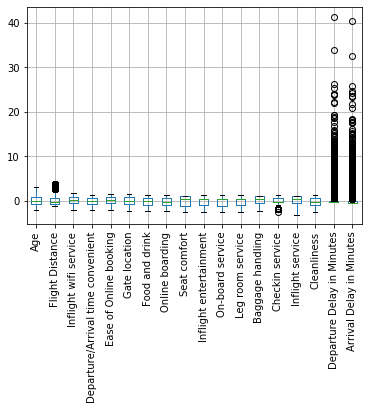

In [498]:
numerical_cols.boxplot()
plt.xticks(rotation=90)

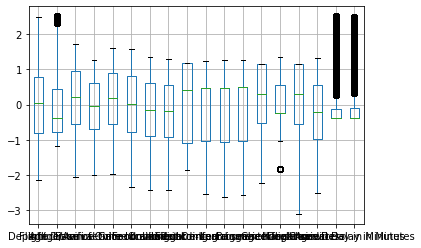

In [499]:
numerical_cols= numerical_cols[(numerical_cols < 2.5).all(axis=1)]
numerical_cols.boxplot()

# Building a better KNN Model
I decided to use gridsearch to help me get the best parameters to use for my model.

In [213]:
knn_params={'weights':['distance','uniform'],
            'p':[1,2,3],
            'algorithm' :['auto', 'ball_tree', 'kd_tree'],
               'n_neighbors':range(2,5)}

In [214]:
knn_grid_search = GridSearchCV(knn, knn_params, cv=3,)

In [188]:
knn_grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
knn_grid_search.best_params_

In [ ]:
knn_grid_search.cv_results_

In [391]:
knn2= KNeighborsClassifier(algorithm='ball_tree',p=1,n_neighbors=4)
knn2.fit(X_train, y_train)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                     weights='uniform')

In [392]:
Y_predknn2 = knn2.predict(X_train)

In [393]:
Accuracyk2= str(metrics.accuracy_score(y_train,Y_predknn2))
Recallk2= str(metrics.recall_score(y_train, Y_predknn2))
Precisionk2=str(metrics.precision_score(y_train,Y_predknn2))
F1k2=str(metrics.f1_score(y_train,Y_predknn2))
Roc_Auck2=str(metrics.roc_auc_score(y_train, Y_predknn2))
scoresk2=Accuracyk2,Recallk2,Precisionk2,F1k2,Roc_Auck2

In [394]:
for score in scoresk2:
    print('Scores for Improved KNN Model')
    print (score+':','Acuracy')
    print(scores_bknn[1],':','Recall')
    print(scores_bknn[2],':','Precision_bknn')
    print(scores_bknn[3],':','F1')
    print(scores_bknn[4],':','Roc_Auc')
    break

Scores for Improved KNN Model
0.8792880844645551: Acuracy
0.7628163982920771 : Recall
0.8274004116721153 : Precision_bknn
0.7937969187878436 : F1
0.8208027827096624 : Roc_Auc


In [395]:
for score in scores_bknn:
    print('Scores For Base KNN model')
    print (score+':','Acuracy')
    print(scores_bknn[1],':','Recall')
    print(scores_bknn[2],':','Precision_bknn')
    print(scores_bknn[3],':','F1')
    print(scores_bknn[4],':','Roc_Auc')
    break

Scores For Base KNN model
0.8286455505279035: Acuracy
0.7628163982920771 : Recall
0.8274004116721153 : Precision_bknn
0.7937969187878436 : F1
0.8208027827096624 : Roc_Auc


# Upgrading my linear Regressinon Model 
I am going to upgrade my linear regression model also using gridsearch

In [224]:
lr_params={'penalty':['l1', 'l2'],
            'fit_intercept':['True','False'],
            'max_iter':range(50,250,25),
              'class_weight':[None,'balanced']}


In [ ]:
lr_grid_search = GridSearchCV(lr, lr_params, cv=3,)
lr_grid_search.fit(X_train, y_train)

In [ ]:
lr_grid_search.best_params_

In [225]:
lr2= LogisticRegression(fit_intercept='False',max_iter=50,penalty='l2')
lr2.fit(X_train, y_train)
X_predlr2 = lr2.predict(X_train)

/Users/sabirrahmanny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [226]:
Accuracylr2= str(metrics.accuracy_score(y_train,X_predlr2))
Recalllr2= str(metrics.recall_score(y_train, X_predlr2))
Precisionlr2=str(metrics.precision_score(y_train,X_predlr2))
F1lr2=str(metrics.f1_score(y_train,X_predlr2))
Roc_Auclr2=str(metrics.roc_auc_score(y_train, X_predlr2))
scoreslr2=Accuracylr2,Recalllr2,Precisionlr2,F1lr2,Roc_Auclr2

In [227]:
for score in scoreslr2:
    print('Scores for Improved LR Model')
    print (score+':','Acuracy')
    print(scores_bknn[1],':','Recall')
    print(scores_bknn[2],':','Precision_bknn')
    print(scores_bknn[3],':','F1')
    print(scores_bknn[4],':','Roc_Auc')
    break

Scores for Improved KNN Model
0.8758612368024132: Acuracy
0.7628163982920771 : Recall
0.8274004116721153 : Precision_bknn
0.7937969187878436 : F1
0.8208027827096624 : Roc_Auc


In [228]:
for score in scores_blr:
    print('Scores for my base model')
    print (score+':','Acuracy')
    print(scores_bknn[1],':','Recall')
    print(scores_bknn[2],':','Precision_bknn')
    print(scores_bknn[3],':','F1')
    print(scores_bknn[4],':','Roc_Auc')
    break

Scores for my base model
0.8758612368024132: Acuracy
0.7628163982920771 : Recall
0.8274004116721153 : Precision_bknn
0.7937969187878436 : F1
0.8208027827096624 : Roc_Auc


In [231]:
cmlr2=confusion_matrix(y_train, X_predlr2)
cmlr2

array([[42582,  4460],
       [ 5828, 30005]])

# Analyisis for Linear Regression
 for my analysis i am going find coefecients that effect satisfaction the most

In [247]:

lstlr2=[]
for coef,columns in zip(list(airline[airline.columns]),list(lr2.coef_)[0]):
    lstlr2.append((columns,coef))

sorted(lstlr2)

[(-2.730263424033945, 'Personal Travel'),
 (-2.061982441825644, 'disloyal Customer'),
 (-0.8751380038595484, 'Eco Plus'),
 (-0.7597865776826492, 'Eco'),
 (-0.1336648290772846, 'Ease of Online booking'),
 (-0.12039385134365757, 'Departure/Arrival time convenient'),
 (-0.02283030407452661, 'Food and drink'),
 (-0.009372592748053698, 'Arrival Delay in Minutes'),
 (-0.008144444900599403, 'Age'),
 (-3.083594618226807e-05, 'Flight Distance'),
 (0.004690438346416737, 'Departure Delay in Minutes'),
 (0.01856672894792409, 'Gate location'),
 (0.027874684568924293, 'Male'),
 (0.0651926500333152, 'Inflight entertainment'),
 (0.07141908882729982, 'Seat comfort'),
 (0.11511963241627259, 'Inflight service'),
 (0.1327980386024899, 'Baggage handling'),
 (0.21694564614225365, 'Cleanliness'),
 (0.25456590020982794, 'Leg room service'),
 (0.2998879864698413, 'On-board service'),
 (0.32426644500374213, 'Checkin service'),
 (0.397223811494219, 'Inflight wifi service'),
 (0.6023382879796169, 'Online boarding

In [248]:
dictlr2=dict((y, x) for x, y in lstlr2)
dictlr2

{'Age': -0.008144444900599403,
 'Flight Distance': -3.083594618226807e-05,
 'Inflight wifi service': 0.397223811494219,
 'Departure/Arrival time convenient': -0.12039385134365757,
 'Ease of Online booking': -0.1336648290772846,
 'Gate location': 0.01856672894792409,
 'Food and drink': -0.02283030407452661,
 'Online boarding': 0.6023382879796169,
 'Seat comfort': 0.07141908882729982,
 'Inflight entertainment': 0.0651926500333152,
 'On-board service': 0.2998879864698413,
 'Leg room service': 0.25456590020982794,
 'Baggage handling': 0.1327980386024899,
 'Checkin service': 0.32426644500374213,
 'Inflight service': 0.11511963241627259,
 'Cleanliness': 0.21694564614225365,
 'Departure Delay in Minutes': 0.004690438346416737,
 'Arrival Delay in Minutes': -0.009372592748053698,
 'Male': 0.027874684568924293,
 'disloyal Customer': -2.061982441825644,
 'Personal Travel': -2.730263424033945,
 'Eco': -0.7597865776826492,
 'Eco Plus': -0.8751380038595484}

In [249]:
negdictlr2=dict((k, v) for k, v in dictlr2.items() if v < 0)

Text(0.5, 1.0, 'Feature relationship with Satisfaction')

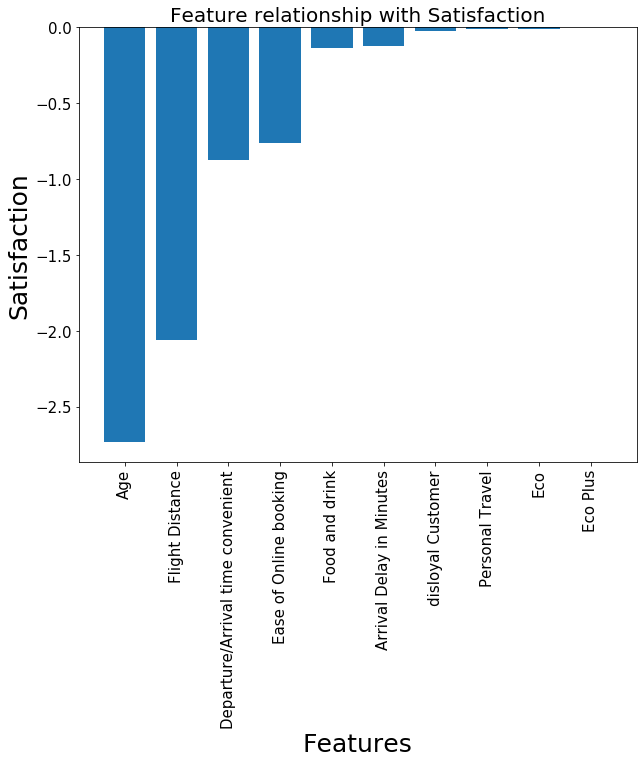

In [400]:
plt.figure(figsize=(10,8))
plt.bar(height=sorted(negdictlr2.values()),x=negdictlr2.keys())
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Features',fontsize=25)
plt.ylabel('Satisfaction',fontsize=25)
plt.title('Feature relationship with Satisfaction',fontsize=20)

In [293]:
posdictlr2=dict((k, v) for k, v in dictlr2.items() if v >0)

Text(0.5, 1.0, 'Feature relationship with Satisfaction')

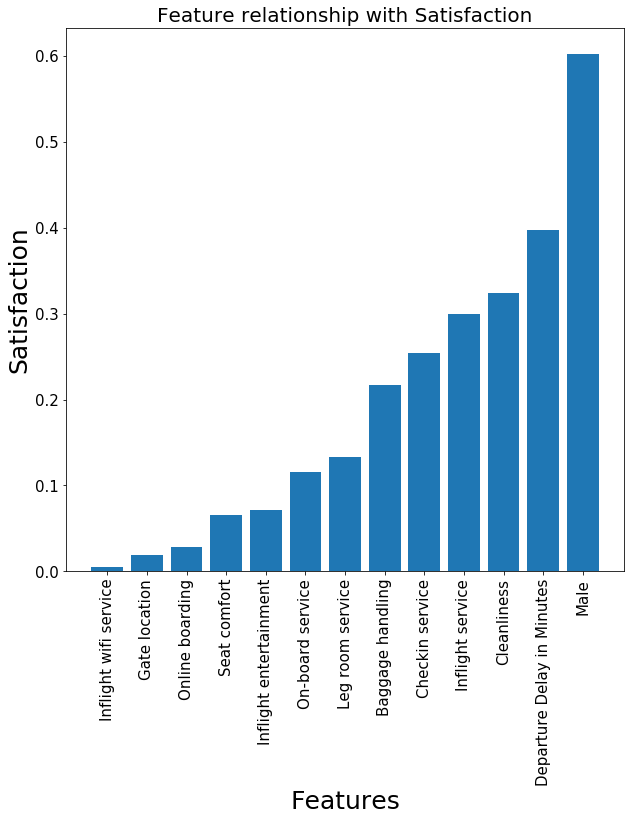

In [438]:
plt.figure(figsize=(10,10))
plt.bar(height=sorted(posdictlr2.values()),x=posdictlr2.keys())
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Features',fontsize=25)
plt.ylabel('Satisfaction',fontsize=25)
plt.title('Feature relationship with Satisfaction',fontsize=20)

Text(0.5, 1, 'Confusion Matrix')

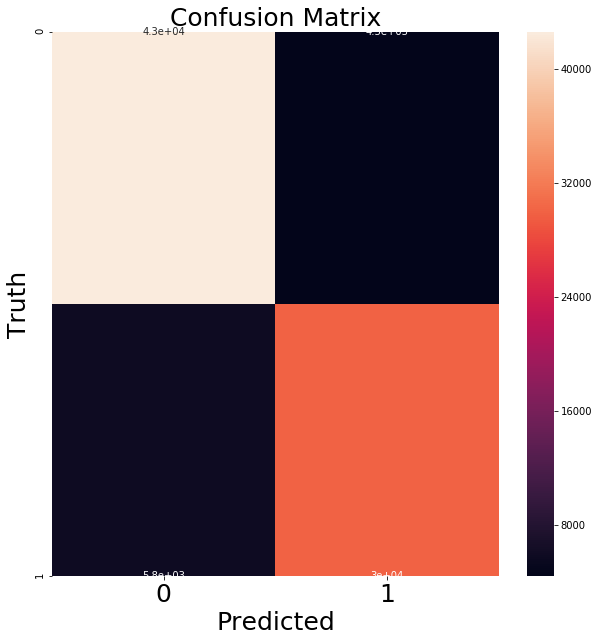

In [301]:
plt.figure(figsize=(10,10))
sns.heatmap(cmlr2,annot=True)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Truth',fontsize=25)
plt.xticks(fontsize=25)
plt.title('Confusion Matrix',fontsize=25)

In [ ]:
# upgraded DecisonTree

In [302]:
dtc_params={'criterion':['gini','entropy'],
           'max_depth':range(2,10),
           'min_samples_split':range(2,10)} 

In [ ]:
dtc_grid_search = GridSearchCV(dtc, dtc_params, cv=3,)

In [ ]:
dtc_grid_search.fit(X_train, y_train)

In [ ]:
dtc_grid_search.best_params_

In [303]:
dtc2=DecisionTreeClassifier(max_depth=9,criterion='entropy',min_samples_split=7)

In [304]:
dtc2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [306]:
Y_preddtc2 = dtc2.predict(X_train)

In [308]:
Accuracydtc2= str(metrics.accuracy_score(y_train,Y_preddtc2))
Recalldtc2= str(metrics.recall_score(y_train, Y_preddtc2))
Precisiondtc2=str(metrics.precision_score(y_train,Y_preddtc2))
F1dtc2=str(metrics.f1_score(y_train,Y_preddtc2))
Roc_Aucdtc2=str(metrics.roc_auc_score(y_train,Y_preddtc2))
scoresdtc2=Accuracydtc2,Recalldtc2,Precisiondtc2,F1dtc2,Roc_Aucdtc2

In [309]:
for score in scoresdtc2:
    print('Scores for my base model')
    print (score+':','Acuracy')
    print(scores_bknn[1],':','Recall')
    print(scores_bknn[2],':','Precision_bknn')
    print(scores_bknn[3],':','F1')
    print(scores_bknn[4],':','Roc_Auc')
    break

Scores for my base model
0.9431553544494721: Acuracy
0.7628163982920771 : Recall
0.8274004116721153 : Precision_bknn
0.7937969187878436 : F1
0.8208027827096624 : Roc_Auc


In [310]:
cmdtc2=confusion_matrix(y_train, X_predlr2)
cmdtc2

array([[42582,  4460],
       [ 5828, 30005]])

Text(0.5, 1, 'Confusion Matrix')

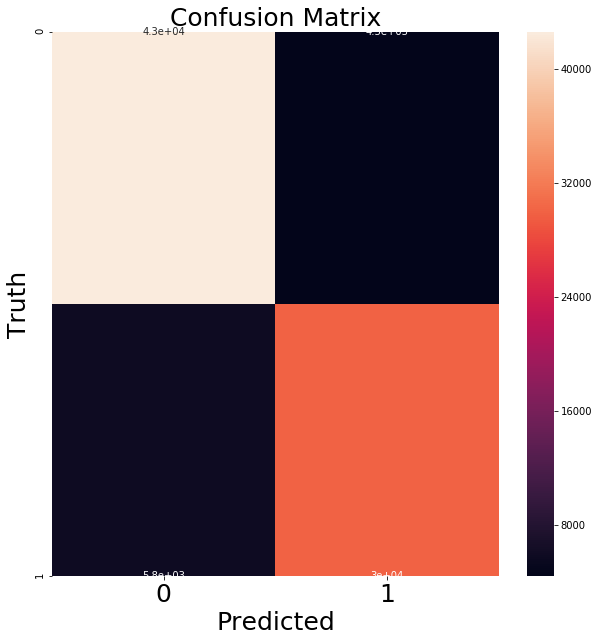

In [312]:
plt.figure(figsize=(10,10))
sns.heatmap(cmdtc2,annot=True)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Truth',fontsize=25)
plt.xticks(fontsize=25)
plt.title('Confusion Matrix',fontsize=25)

# ensamble methods

In [360]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [361]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [362]:
bagged_tree.score(X_train, y_train)

0.9061116138763198

In [363]:
# random forrest

In [418]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [419]:
forest.score(X_train, y_train)

0.9477164404223227

In [420]:
forest.feature_importances_

array([0.01313311, 0.02375231, 0.16413724, 0.01462521, 0.03829244,
       0.0092047 , 0.00873082, 0.19845097, 0.04196673, 0.08112177,
       0.02750902, 0.0434901 , 0.01861575, 0.01530258, 0.01785914,
       0.02459174, 0.0024658 , 0.00421012, 0.00129306, 0.03608035,
       0.12260519, 0.08823114, 0.00433071])

In [421]:
lstrf=[]
for columns,coef in zip(list(airline[airline.columns]),list(forest.feature_importances_)):
    lstrf.append((columns,coef))

In [422]:
y_predsrf=forest.predict(X_train)

In [423]:
cmrfc=confusion_matrix(y_train,y_predsrf)

Text(0.5, 1, 'Confusion Matrix')

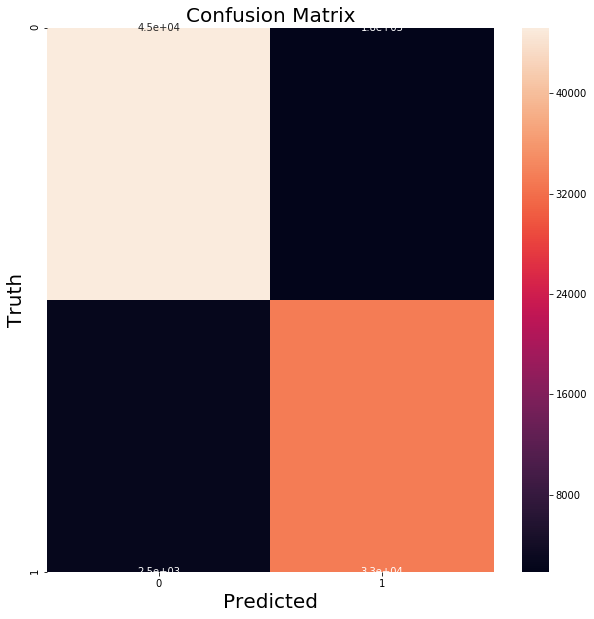

In [428]:
plt.figure(figsize=(10,10))
sns.heatmap(cmrfc,annot=True)
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Truth',fontsize=20)
plt.title('Confusion Matrix',fontsize=20)

In [425]:
Accuracyrfc= str(metrics.accuracy_score(y_train,y_predsrf))
Recallrfc= str(metrics.recall_score(y_train,y_predsrf))
Precisionrfc=str(metrics.precision_score(y_train,y_predsrf))
F1rfc=str(metrics.f1_score(y_train,y_predsrf))
Roc_Aucrfc=str(metrics.roc_auc_score(y_train, y_predsrf))
scoresrfc=Accuracyk2,Recallk2,Precisionk2,F1k2,Roc_Auck2

In [426]:
for score in scoresrfc:
    print('Random Forest Score')
    print(scoresrfc[0]+':','Acuracy')
    print(scoresrfc[1],':','Recall')
    print(scoresrfc[2],':','Precision_bknn')
    print(scoresrfc[3],':','F1')
    print(scoresrfc[4],':','Roc_Auc')
    break

Random Forest Score
0.8792880844645551: Acuracy
0.7729746323221611 : Recall
0.936787634863192 : Precision_bknn
0.8470336391437309 : F1
0.8666220893424929 : Roc_Auc


In [373]:
lstrf

[('Age', 0.008196686200461456),
 ('Flight Distance', 0.024374979925971343),
 ('Inflight wifi service', 0.12551600047465658),
 ('Departure/Arrival time convenient', 0.002469282525409878),
 ('Ease of Online booking', 0.03225634896625924),
 ('Gate location', 0.00166724852525892),
 ('Food and drink', 0.005425620873753305),
 ('Online boarding', 0.24264621467824166),
 ('Seat comfort', 0.054331094047256355),
 ('Inflight entertainment', 0.08065436068663918),
 ('On-board service', 0.03113531438676387),
 ('Leg room service', 0.06250609195290455),
 ('Baggage handling', 0.014707168851582055),
 ('Checkin service', 0.008420752967401694),
 ('Inflight service', 0.011360766250268417),
 ('Cleanliness', 0.021290233065559307),
 ('Departure Delay in Minutes', 0.00041428068178669334),
 ('Arrival Delay in Minutes', 0.0014261768398702072),
 ('Male', 0.0006169387474316803),
 ('disloyal Customer', 0.018567677285679776),
 ('Personal Travel', 0.1340421016254135),
 ('Eco', 0.11502679107283557),
 ('Eco Plus', 0.002

In [378]:
dictrf=dict((x, y) for x, y in lstrf)
dictrf

{'Age': 0.008196686200461456,
 'Flight Distance': 0.024374979925971343,
 'Inflight wifi service': 0.12551600047465658,
 'Departure/Arrival time convenient': 0.002469282525409878,
 'Ease of Online booking': 0.03225634896625924,
 'Gate location': 0.00166724852525892,
 'Food and drink': 0.005425620873753305,
 'Online boarding': 0.24264621467824166,
 'Seat comfort': 0.054331094047256355,
 'Inflight entertainment': 0.08065436068663918,
 'On-board service': 0.03113531438676387,
 'Leg room service': 0.06250609195290455,
 'Baggage handling': 0.014707168851582055,
 'Checkin service': 0.008420752967401694,
 'Inflight service': 0.011360766250268417,
 'Cleanliness': 0.021290233065559307,
 'Departure Delay in Minutes': 0.00041428068178669334,
 'Arrival Delay in Minutes': 0.0014261768398702072,
 'Male': 0.0006169387474316803,
 'disloyal Customer': 0.018567677285679776,
 'Personal Travel': 0.1340421016254135,
 'Eco': 0.11502679107283557,
 'Eco Plus': 0.0029478693685947677}

Text(0.5, 1.0, 'Feature Importance with Satisfaction')

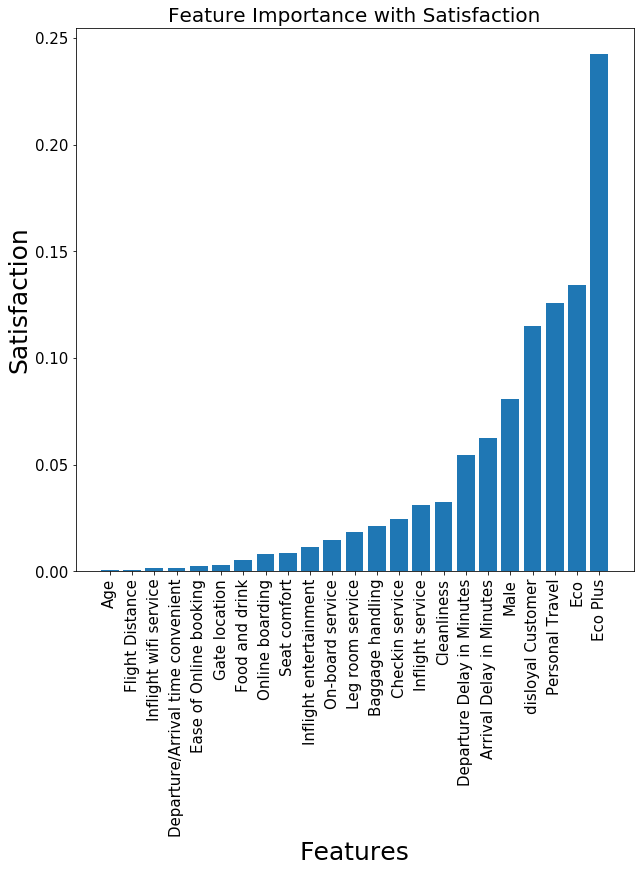

In [437]:
plt.figure(figsize=(10,10))
plt.bar(height=sorted(dictrf.values()),x=dictrf.keys())
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Features',fontsize=25)
plt.ylabel('Satisfaction',fontsize=25)
plt.title('Feature Importance with Satisfaction',fontsize=20)

# After analysis EDA
After finishing my models i decided to take a closer look at the features that stood out in my model

In [478]:
airline.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [501]:
Eco_Plus=airline[airline['Eco Plus'] ==1 ] 

In [481]:
Eco_Plus.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7468.000000
mean,51862.930611,58448.238591,38.654524,747.125567,2.767948,3.217507,2.661996,2.967574,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771,15.431545,16.088645
std,29981.196651,36131.071732,16.614503,579.857640,1.287222,1.480397,1.371423,1.250604,1.358097,1.346639,1.337485,1.353530,1.318290,1.350285,1.198691,1.321161,1.185922,1.345041,37.081913,37.756917
min,0.000000,24.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,25790.000000,27875.500000,26.000000,337.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,51879.500000,51462.500000,37.000000,589.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77708.750000,88840.500000,51.000000,979.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,13.000000,15.000000
max,103890.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,570.000000,567.000000


Text(0, 0.5, 'Count')

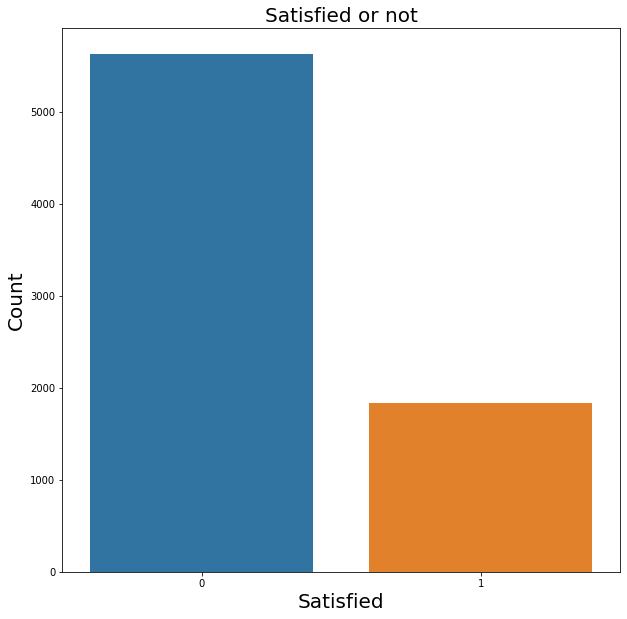

In [504]:
plt.figure(figsize=(10,10))
sns.countplot(x='satisfied',data=Eco_Plus)
plt.title('Satisfied or not',fontsize=20)
plt.xlabel('Satisfied',fontsize=20)
plt.ylabel('Count',fontsize=20)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text yticklabel objects>)

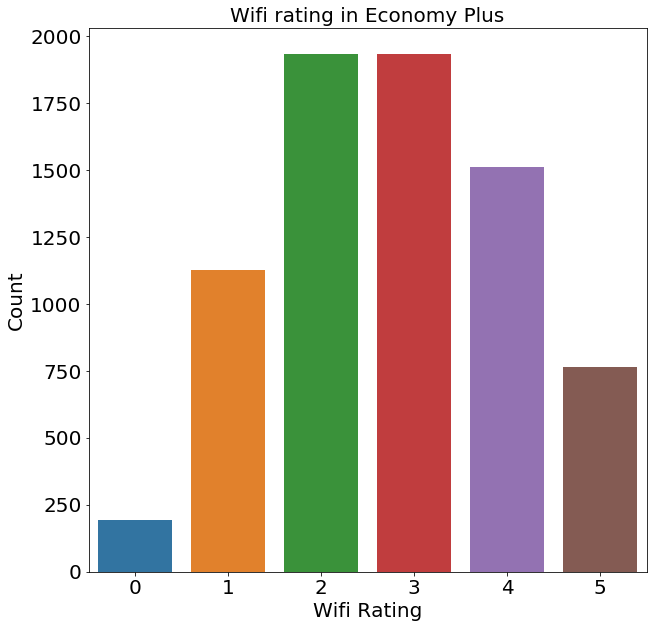

In [513]:
plt.figure(figsize=(10,10))
sns.countplot(x='Inflight wifi service',data=Eco_Plus)
plt.title('Wifi rating in Economy Plus',fontsize=20)
plt.xlabel('Wifi Rating',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 <a list of 9 Text yticklabel objects>)

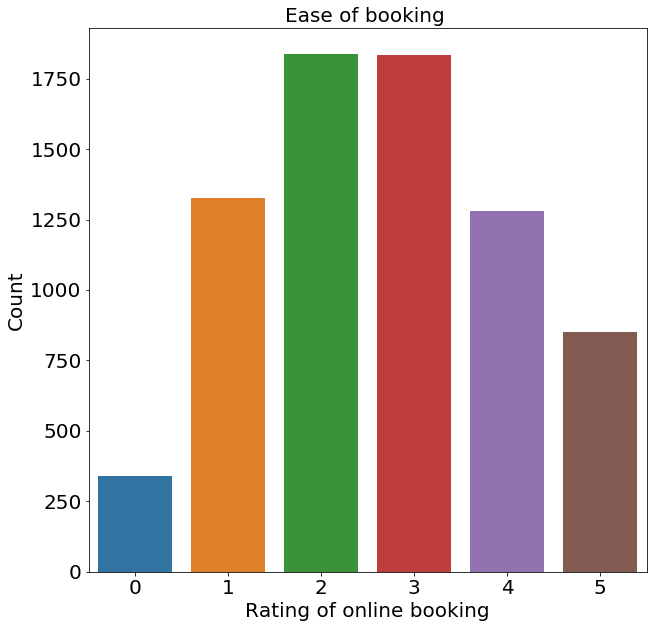

In [516]:
plt.figure(figsize=(10,10))
sns.countplot(x='Ease of Online booking',data=Eco_Plus)
plt.title('Ease of booking ',fontsize=20)
plt.xlabel('Rating of online booking',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [ ]:
#Average age of the people were waround 35-50
plt.figure(figsize=(10,10))
sns.distplot(airline['Age'],label='Overall')
sns.distplot(satisfied_flights['Age'],label='Satisfied')
plt.title('Age and Satisfaction',fontsize=20)
plt.ylabel('Distribution of Age',fontsize=20)
plt.xlabel('Age',fontsize=20)


Text(0.5, 0, 'Age')

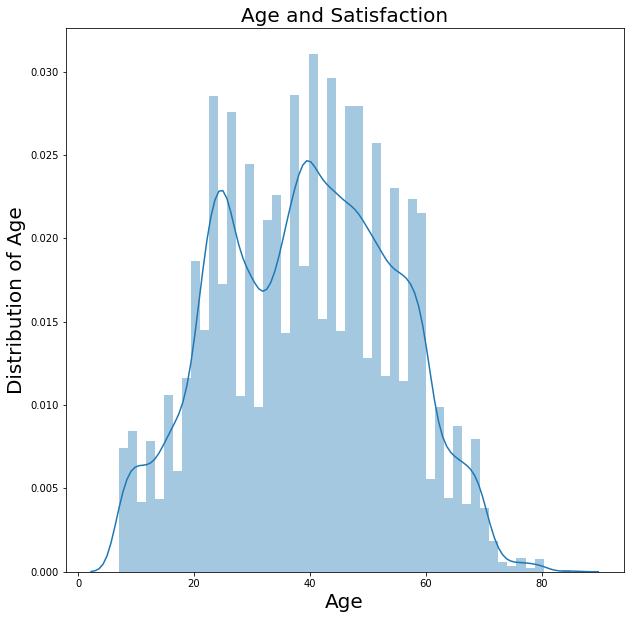

In [521]:
Airline_Age=airline[airline['satisfied'] ==1 ] 

In [522]:
Airline_Age

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,0,0,1
7,52,2035,4,3,4,4,5,5,5,5,...,5,4,4,0.0,0,0,0,0,0,1
13,33,946,4,2,4,3,4,4,4,4,...,2,4,0,0.0,1,0,1,1,0,1
16,26,2123,3,3,3,3,4,4,4,4,...,4,4,49,51.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103890,56,550,3,5,5,5,2,5,4,3,...,3,3,0,0.0,0,0,0,0,1,1
103891,54,1991,5,5,5,5,2,5,5,4,...,4,4,35,31.0,1,0,0,0,0,1
103894,26,712,4,4,4,4,5,5,5,5,...,4,5,17,26.0,1,0,0,0,0,1
103897,60,1599,5,5,5,5,5,5,4,4,...,4,4,9,7.0,0,0,0,0,0,1


In [528]:
Airline_Age.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
count,44897.000000,44897.000000,44897.000000,44897.000000,44897.000000,44897.000000,44897.000000,44897.000000,44897.000000,44897.000000,...,44897.000000,44897.000000,44897.000000,44897.000000,44897.000000,44897.000000,44897.000000,44897.000000,44897.000000,44897.0
mean,41.748558,1530.180302,3.161191,2.969887,3.031316,2.977682,3.520814,4.027285,3.966234,3.965276,...,3.969887,3.744081,12.546362,12.630799,0.499543,0.099873,0.072677,0.193131,0.040894,1.0
std,12.765169,1128.321401,1.588731,1.552317,1.575395,1.374288,1.236120,1.191743,1.142283,1.076821,...,1.091209,1.142310,35.315723,35.962008,0.500005,0.299834,0.259609,0.394759,0.198046,0.0
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,32.000000,526.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,43.000000,1250.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,51.000000,2405.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,9.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


Text(0, 0.5, 'Count')

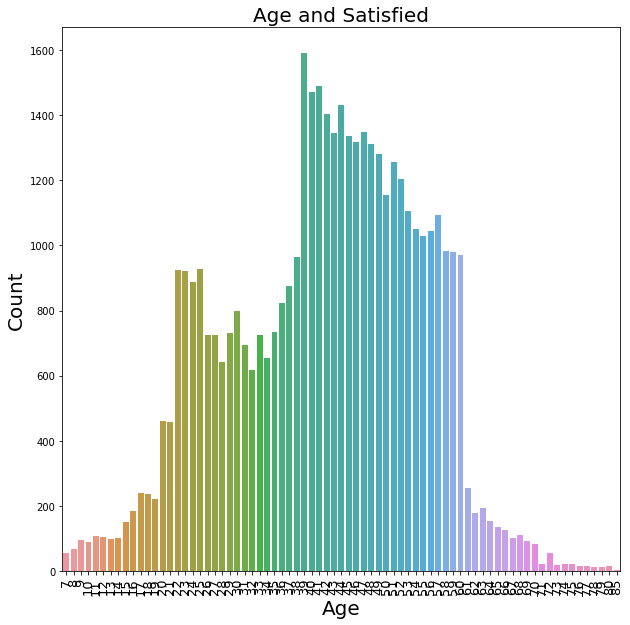

In [540]:
plt.figure(figsize=(10,10))
sns.countplot(x='Age',data=Airline_Age)
plt.xticks(rotation=(90),fontsize=13)
plt.title('Age and Satisfied',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)


In [548]:
Airline_Age_lower=Airline_Age[Airline_Age['Age'] <37 ] 

Age                                    26.385882
Flight Distance                      1364.007319
Inflight wifi service                   3.254487
Departure/Arrival time convenient       2.889225
Ease of Online booking                  3.123654
Gate location                           2.951298
Food and drink                          3.660286
Online boarding                         3.853262
Seat comfort                            3.703568
Inflight entertainment                  3.759519
On-board service                        3.599620
Leg room service                        3.387994
Baggage handling                        3.856851
Checkin service                         3.541066
Inflight service                        3.872334
Cleanliness                             3.694912
Departure Delay in Minutes             12.240833
Arrival Delay in Minutes               12.338729
Male                                    0.498346
disloyal Customer                       0.241185
Personal Travel     

Text(0, 0.5, 'Count')

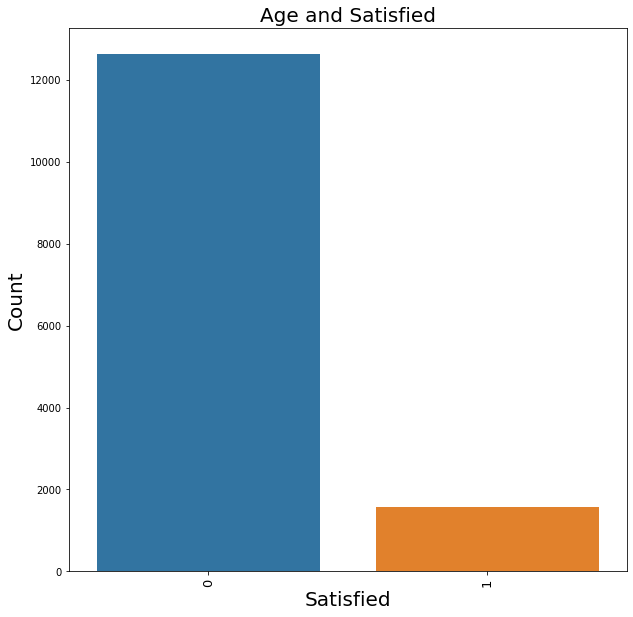

In [555]:
plt.figure(figsize=(10,10))
sns.countplot(x='Personal Travel',data=Airline_Age_lower)
plt.xticks(rotation=(90),fontsize=13)
plt.title('Age and Satisfied',fontsize=20)
plt.xlabel('Satisfied',fontsize=20)
plt.ylabel('Count',fontsize=20)

In [558]:
Airline_Age_lower=airline[airline['Age'] <37 ] 

In [559]:
Airline_Age_lower.mean()

Age                                    24.682944
Flight Distance                      1054.001146
Inflight wifi service                   2.677467
Departure/Arrival time convenient       2.991705
Ease of Online booking                  2.702583
Gate location                           2.976374
Food and drink                          3.164738
Online boarding                         2.887211
Seat comfort                            3.166090
Inflight entertainment                  3.203900
On-board service                        3.252916
Leg room service                        3.231696
Baggage handling                        3.661816
Checkin service                         3.227984
Inflight service                        3.675588
Cleanliness                             3.185637
Departure Delay in Minutes             15.170238
Arrival Delay in Minutes               15.687550
Male                                    0.486629
disloyal Customer                       0.313939
Personal Travel     

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text yticklabel objects>)

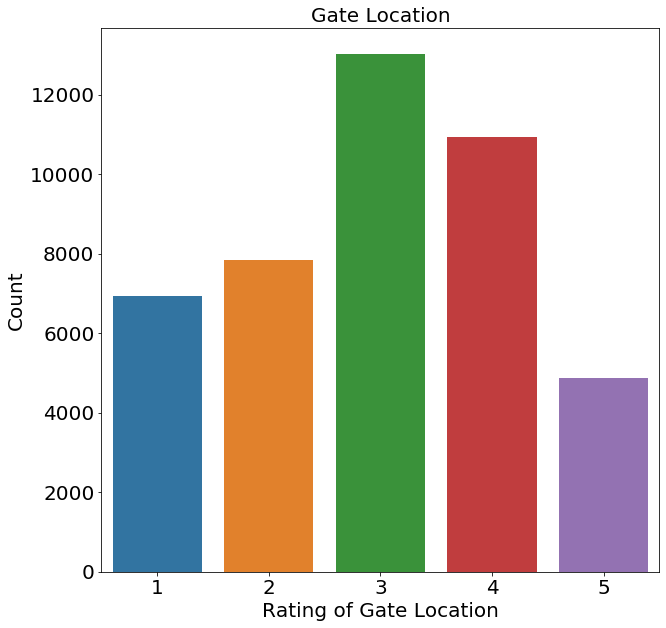

In [570]:
plt.figure(figsize=(10,10))
sns.countplot(x='Gate location',data=Airline_Age_lower)
plt.title('Gate Location',fontsize=20)
plt.xlabel('Rating of Gate Location',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text yticklabel objects>)

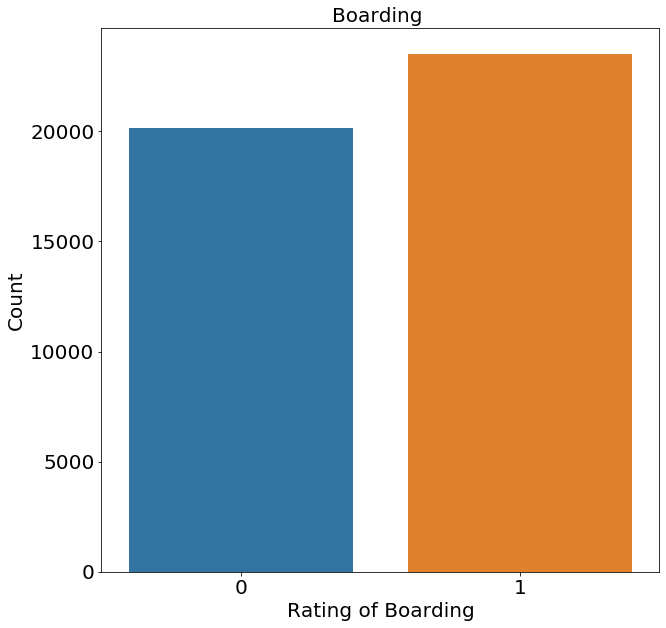

In [564]:
plt.figure(figsize=(10,10))
sns.countplot(x='Eco',data=Airline_Age_lower)
plt.title('Boarding ',fontsize=20)
plt.xlabel('Rating of Boarding',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)